In [13]:
from datetime import datetime
print(f'Päivitetty {datetime.now()}')

Päivitetty 2022-10-18 16:20:22.373127


# Syväopppimisen "Hello World"

**MNIST** on data, joka sisältää kuvia käsin kirjoitetuista numeroista. Jokaisesta kuvasta tiedetään, mitä numeroa se esittää.

Opetetaan kone tunnistamaan käsinkirjoitettuja numeroita neuroverkkomallilla. Tähän tarvitaan **tensorflow**-kirjastoa.

Koodia ei kannata suorittaa Anacondan "base"-ympäristössä, koska **tensorflow**-kirjastoa on vaikea saada toimimaan ilman konflikteja Anacondassa mukana olevien kirjastojen kanssa. Googlen Colabissa koodin voi suorittaa, koska siellä on tarvittavat kirjastot valmiiksi asennettu.

Neuroverkkoja varten voi omalle koneelle tehdä toimivan ympäristön. Itselleni sain toimivan ympäristön seuraavasti:

1. Komentoriviltä uuden ympäristön luonti (tf on ympäristölle antamani nimi): `conda create --name tf`
2. Uuden ympäristön aktivointi: `conda activate tf`
3. Jypyterin asennus: `conda install jupyter`
4. pandas-kirjaston asennus: `conda install pandas`
5. matplotlibin asennus: `conda install matplotlib`
6. tensorflow asennus: `pip install tensorflow`

Tämän jälkeen komentorivillä voi palata "base"-ympäristöön komennolla `conda deactivate` ja siirtyä "tf"-ympäristöön `conda activate tf`. "tf"-ympäristössä komento `Jupyter notebook` käynnistää Jupyterin "tf"-ympäristöön.

In [1]:
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

# Data löytyy keras-kirjaston esimerkki-datoista
from tensorflow.keras.datasets import mnist
# Data on valmiiksi jaettu opetus- ja testidataan
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
# Opetusdata sisältää 60000 kuvaa (kukin kuva kooltaan 28x28 pikseliä)
train_images.shape

(60000, 28, 28)

In [3]:
# Testidata sisältää 10000 kuvaa
test_images.shape

(10000, 28, 28)

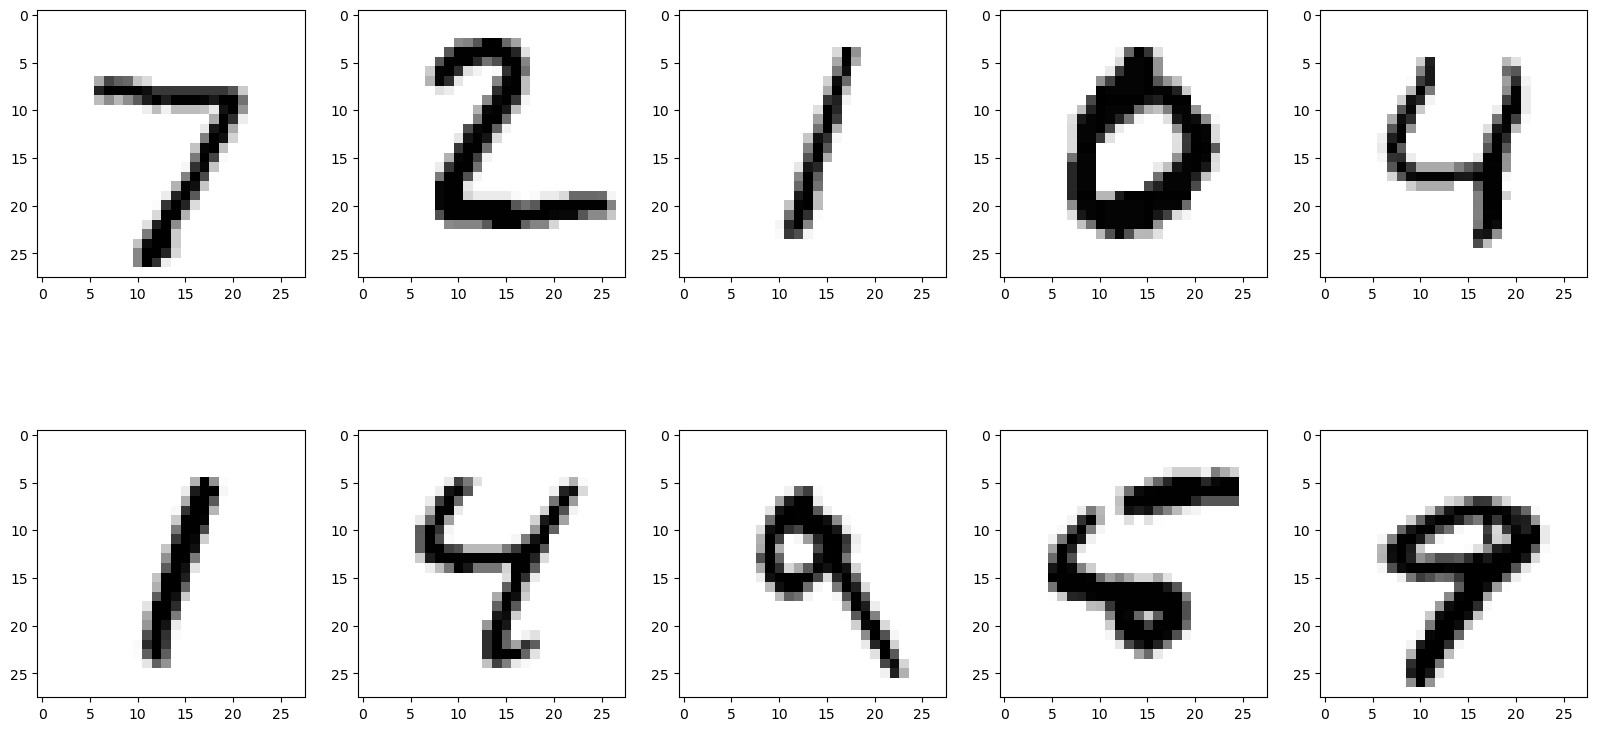

In [4]:
# Testidatan kymmenen ensimmäistä kuvaa

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))

for i in range(5):
  axs[0, i].imshow(test_images[i], cmap=plt.cm.binary)
  axs[1, i].imshow(test_images[5+i], cmap=plt.cm.binary)

In [5]:
# Testidatan kymmenen ensimmäistä numeroa
print(test_labels[0:10])

[7 2 1 0 4 1 4 9 5 9]


In [6]:
# Käytetään kaksivaiheista mallia
malli = keras.Sequential([layers.Dense(512, activation='relu'),
                          layers.Dense(10, activation='softmax')])

In [7]:
# Määritetään 
# -optimoija, joka optimoi häviöfunktion mahdollisimman pieneksi
# -häviöfunktio, joka mittaa mallin virheitä
# -mallin hyvyyden mittamisessa käytettävä tunnusluku
malli.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Muunnetaan data syötteeksi kelpaavaan muotoon
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') /255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') /255

In [9]:
# Mallin sovitus (koko data käydään läpi 5 kertaa 128 kuvan erissä)
malli.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.2551 - accuracy: 0.9269
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1028 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0677 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0490 - accuracy: 0.9849
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0368 - accuracy: 0.9887


In [10]:
# Mallin arviointi: loss = häviöfunktion arvo testidatassa, 
# accuracy = kuinka suuri osuus testidatan kuvista tunnistetaan oikein?
malli.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0725 - accuracy: 0.9790


[0.07250083237886429, 0.9789999723434448]

In [11]:
# Mallin todennäköisyydet kymmenelle ensimmäiselle kuvalle
# Esimerkiksi ensimmäisen kuvan kohdalla korkein todennäköisyys (99,999578 %) numerolle 7
predictions= malli.predict(test_images[0:10])
predictions

1/1 [==============================] - 0s 82ms/step


array([[4.00301264e-10, 1.27060808e-12, 3.84356099e-07, 5.51257472e-06,
        9.24308590e-13, 1.01991144e-08, 4.37505435e-16, 9.99994040e-01,
        5.21370058e-09, 1.02526194e-07],
       [6.69354502e-12, 3.68010085e-08, 1.00000000e+00, 1.02580353e-08,
        9.63980049e-21, 1.87650140e-09, 3.46875445e-11, 1.18581645e-18,
        4.84947971e-10, 2.52793033e-18],
       [2.98817291e-08, 9.97360528e-01, 3.03631561e-04, 3.17525191e-05,
        1.87815254e-04, 1.27916101e-05, 2.45797833e-06, 1.48486497e-03,
        6.05961483e-04, 1.01520436e-05],
       [9.99906301e-01, 2.43417781e-13, 2.24586074e-05, 2.17923937e-08,
        1.33309115e-07, 6.95426650e-08, 1.86809723e-06, 6.58744393e-05,
        2.71512729e-10, 3.38573068e-06],
       [1.85561163e-07, 1.67810319e-12, 1.13970680e-06, 6.12341644e-09,
        9.98683393e-01, 4.01351663e-08, 6.37917363e-09, 2.67684045e-05,
        5.45032719e-07, 1.28788350e-03],
       [4.15896262e-10, 9.98077989e-01, 3.54353142e-06, 1.62803042e-06,
   

In [12]:
# Mallin antamat ennusteet kymmenelle ensimmäiselle kuvalle menevät oikein
for i in range(10):
  print(predictions[i].argmax(), end=' ')

7 2 1 0 4 1 4 9 5 9 